# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [4]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

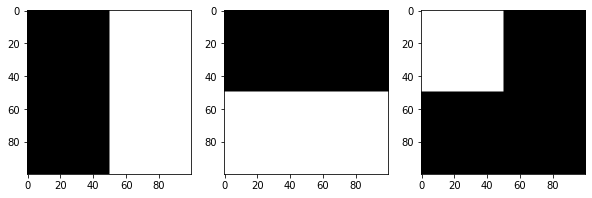

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


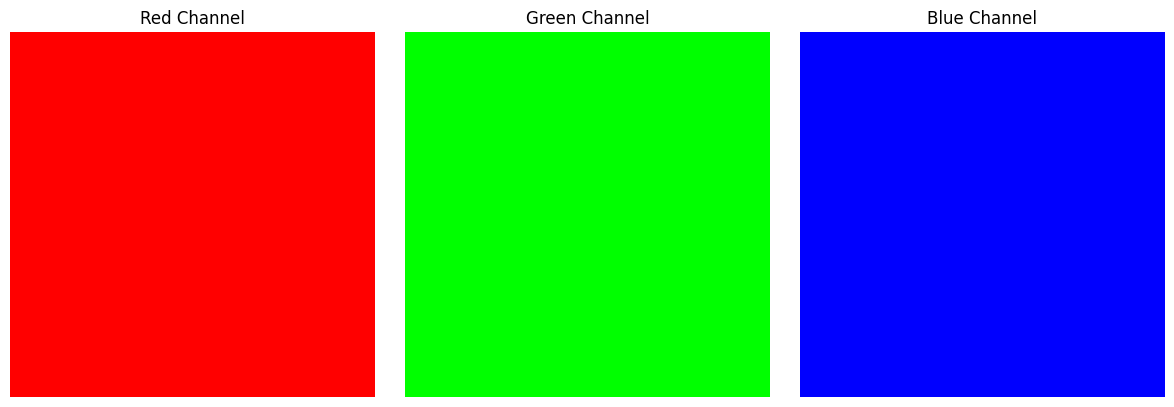

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 100x100 image for each color channel
width, height = 100, 100

# Create an image with the red channel
red_image = np.zeros((height, width, 3), dtype=np.uint8)
red_image[:, :, 0] = 255  # Set the red channel to maximum value

# Create an image with the green channel
green_image = np.zeros((height, width, 3), dtype=np.uint8)
green_image[:, :, 1] = 255  # Set the green channel to maximum value

# Create an image with the blue channel
blue_image = np.zeros((height, width, 3), dtype=np.uint8)
blue_image[:, :, 2] = 255  # Set the blue channel to maximum value

# Visualize the created images in a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot each image
axes[0].imshow(red_image)
axes[0].set_title("Red Channel")
axes[0].axis("off")  # Turn off axis

axes[1].imshow(green_image)
axes[1].set_title("Green Channel")
axes[1].axis("off")  # Turn off axis

axes[2].imshow(blue_image)
axes[2].set_title("Blue Channel")
axes[2].axis("off")  # Turn off axis

# Show the plot
plt.tight_layout()
plt.show()


*   Use the above three images to create the following image

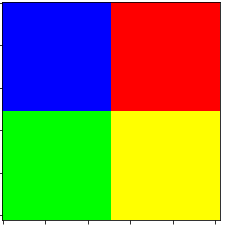
*Hint: Remember channels and color spaces*

In [ ]:
# solution



### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

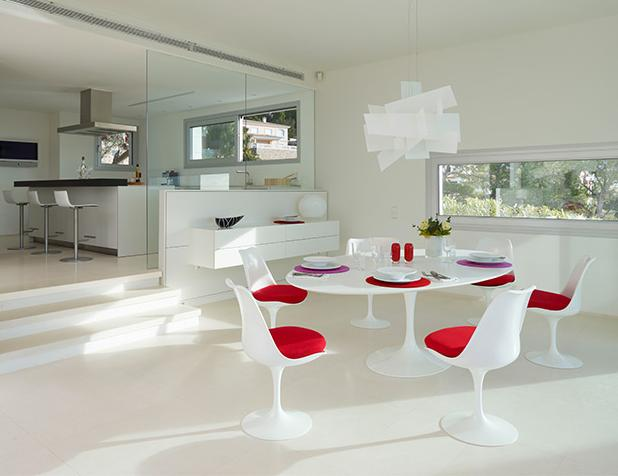

*   Extract individual channels and plot them using matplotlib subplot.



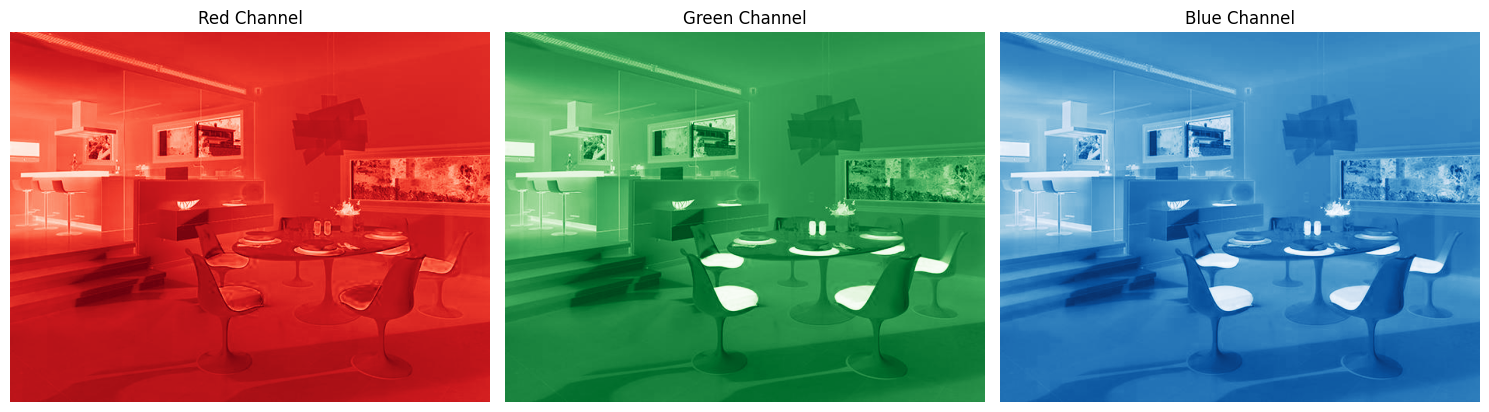

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image from the 'images' folder
img = Image.open("/Users/taifaladwani/Downloads/sillas.jpg")
img = np.array(img)  # Convert the image to a numpy array

# Extract the individual channels
red_channel = img[:, :, 0]   # Extract the red channel
green_channel = img[:, :, 1] # Extract the green channel
blue_channel = img[:, :, 2]  # Extract the blue channel

# Create a 1x3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the red channel
axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title("Red Channel")
axes[0].axis("off")  # Turn off axis

# Plot the green channel
axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title("Green Channel")
axes[1].axis("off")  # Turn off axis

# Plot the blue channel
axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title("Blue Channel")
axes[2].axis("off")  # Turn off axis

# Show the plot
plt.tight_layout()
plt.show()


*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

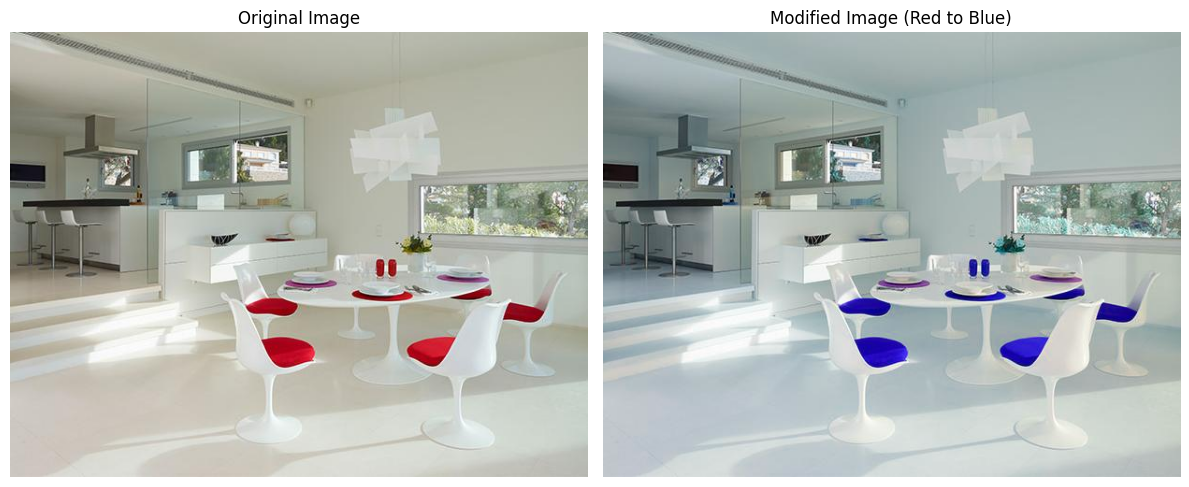

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image from the 'images' folder
img = Image.open("/Users/taifaladwani/Downloads/sillas.jpg")
img_array = np.array(img)  # Convert the image to a numpy array

# Create a copy of the image array to modify
modified_img_array = img_array.copy()

# Change red channel to blue (swap the red and blue channels)
modified_img_array[:, :, 0] = img_array[:, :, 2]  # Set the red channel to the original blue channel
modified_img_array[:, :, 2] = img_array[:, :, 0]  # Set the blue channel to the original red channel

# Create a 1x2 subplot to display the original and modified images
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the original image
axes[0].imshow(img_array)
axes[0].set_title("Original Image")
axes[0].axis("off")  # Turn off axis

# Plot the modified image
axes[1].imshow(modified_img_array)
axes[1].set_title("Modified Image (Red to Blue)")
axes[1].axis("off")  # Turn off axis

# Show the plot
plt.tight_layout()
plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

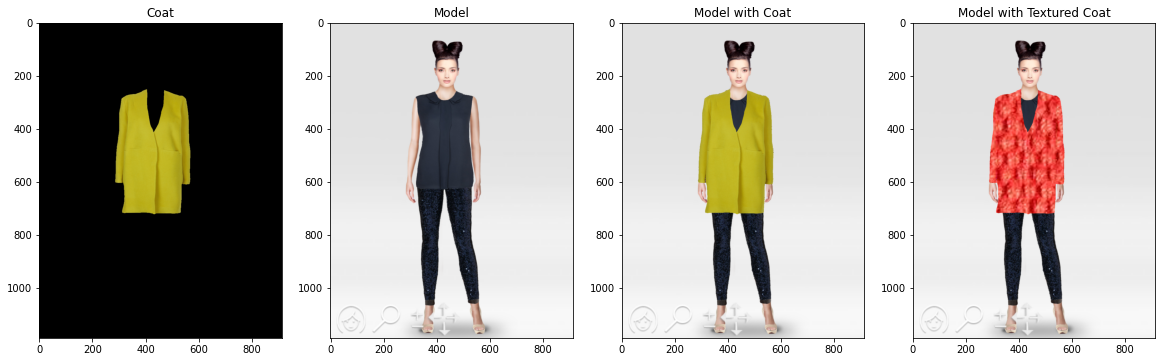

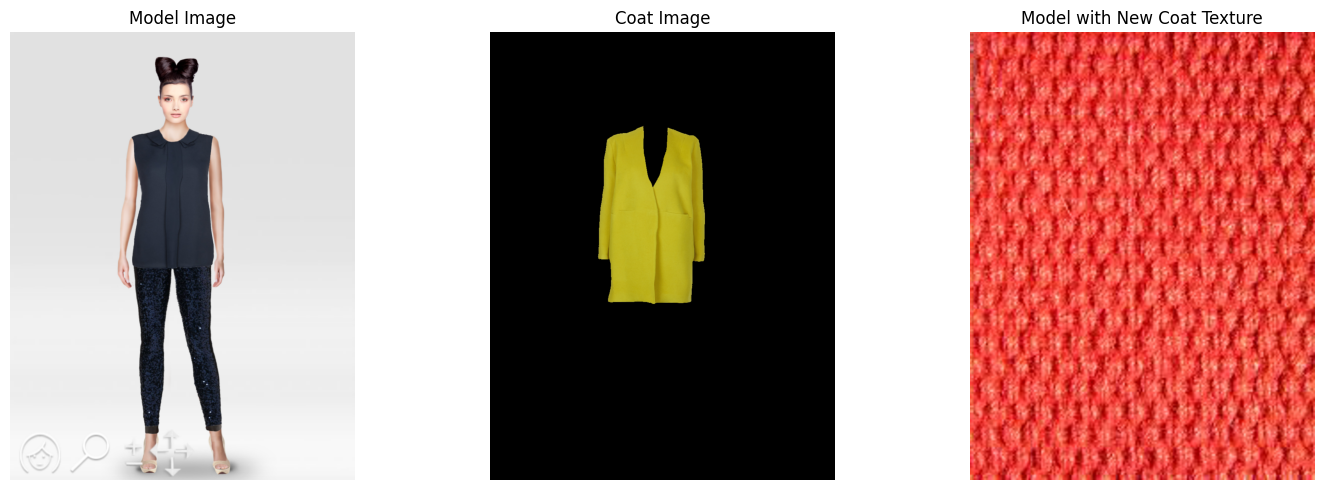

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the images from the specified paths
model_img = Image.open("/Users/taifaladwani/Desktop/4/model.png").convert('RGBA')
coat_img = Image.open("/Users/taifaladwani/Desktop/4/coat.png").convert('RGBA')
texture_img = Image.open("/Users/taifaladwani/Desktop/4/texture2.png").convert('RGBA')

# Convert images to numpy arrays
model_array = np.array(model_img)
coat_array = np.array(coat_img)
texture_array = np.array(texture_img)

# Resize the texture to match the coat size
texture_resized = Image.fromarray(texture_array).resize(coat_img.size)
texture_array_resized = np.array(texture_resized)

# Create a mask for the coat (non-transparent pixels in the coat image)
mask = coat_array[:, :, 3] > 0  # Using alpha channel to identify coat area

# Change the coat texture by replacing coat pixels with the texture's RGB channels
new_coat_array = coat_array.copy()
new_coat_array[mask, :3] = texture_array_resized[mask, :3]  # Replace coat RGB with texture RGB

# Now combine the model image and the new coat
final_image = model_array.copy()

# Apply the new coat to the model (preserving the original model's RGB where the mask is not active)
final_image[mask] = new_coat_array[mask]

# Create a 1x3 subplot to display the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the model image
axes[0].imshow(model_array)
axes[0].set_title("Model Image")
axes[0].axis("off")

# Plot the coat image
axes[1].imshow(coat_array)
axes[1].set_title("Coat Image")
axes[1].axis("off")

# Plot the final image with the model wearing the new coat texture
axes[2].imshow(final_image)
axes[2].set_title("Model with New Coat Texture")
axes[2].axis("off")

# Show the plot
plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




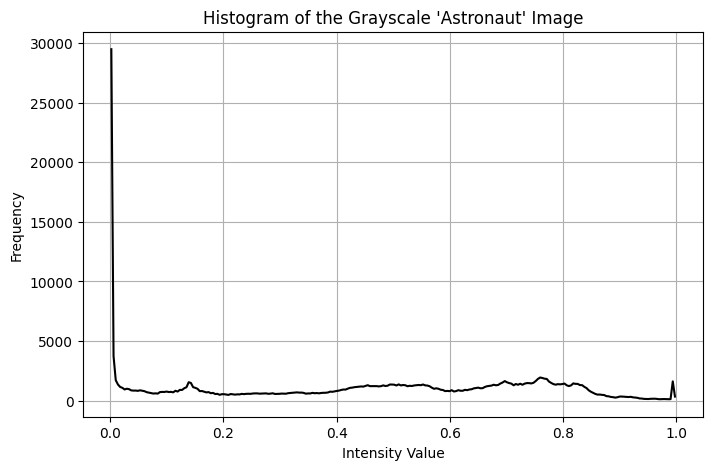

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, exposure

# Step 1: Read the 'astronaut' image from skimage.data
astronaut_img = data.astronaut()

# Step 2: Convert the image to grayscale
astronaut_gray = color.rgb2gray(astronaut_img)

# Step 3: Compute the histogram of the grayscale image
histogram, bin_centers = exposure.histogram(astronaut_gray)

# Step 4: Plot the histogram
plt.figure(figsize=(8, 5))
plt.plot(bin_centers, histogram, color='black')
plt.title("Histogram of the Grayscale 'Astronaut' Image")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

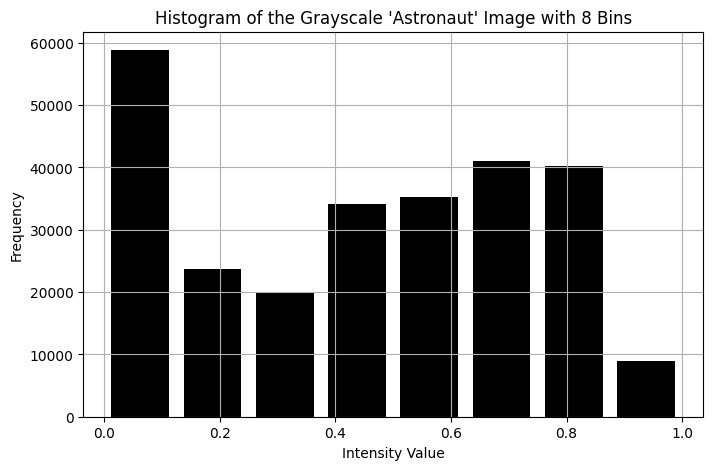

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, exposure

# Step 1: Read the 'astronaut' image from skimage.data
astronaut_img = data.astronaut()

# Step 2: Convert the image to grayscale
astronaut_gray = color.rgb2gray(astronaut_img)

# Step 3: Compute the histogram of the grayscale image with 8 bins
histogram, bin_centers = exposure.histogram(astronaut_gray, nbins=8)

# Step 4: Plot the histogram
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, histogram, width=0.1, color='black')  # Use bar plot for clarity
plt.title("Histogram of the Grayscale 'Astronaut' Image with 8 Bins")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

*(Double-click or enter to edit)*

...


*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


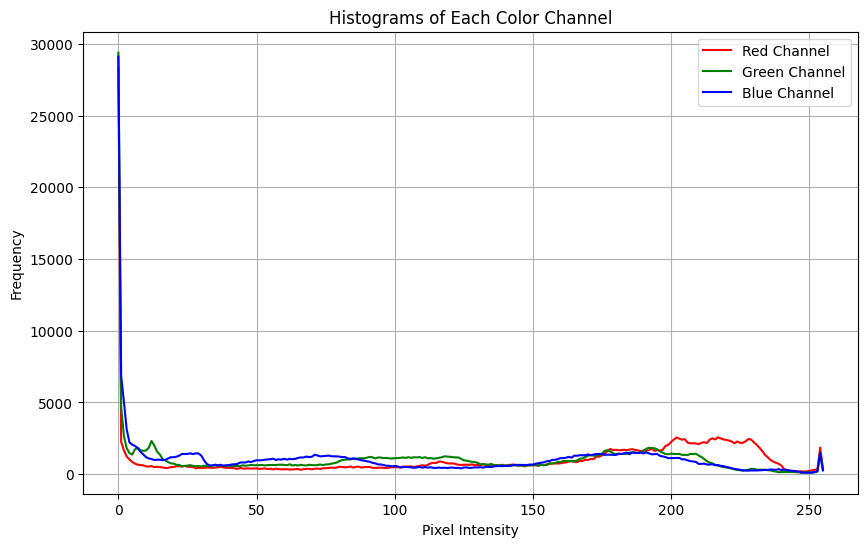

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, exposure

# Step 1: Read the 'astronaut' image
astronaut_img = data.astronaut()

# Step 2: Compute the histogram for the entire color image
histogram_r, bins_r = exposure.histogram(astronaut_img[:, :, 0])  # Red channel
histogram_g, bins_g = exposure.histogram(astronaut_img[:, :, 1])  # Green channel
histogram_b, bins_b = exposure.histogram(astronaut_img[:, :, 2])  # Blue channel

# Step 3: Plot the total histogram and histograms for each channel
plt.figure(figsize=(10, 6))

# Plot for Red channel
plt.plot(bins_r, histogram_r, color='red', label='Red Channel')

# Plot for Green channel
plt.plot(bins_g, histogram_g, color='green', label='Green Channel')

# Plot for Blue channel
plt.plot(bins_b, histogram_b, color='blue', label='Blue Channel')

# Title and labels
plt.title("Histograms of Each Color Channel")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



/Users/taifaladwani/Library/Python/3.9/lib/python/site-packages/skimage/_shared/utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


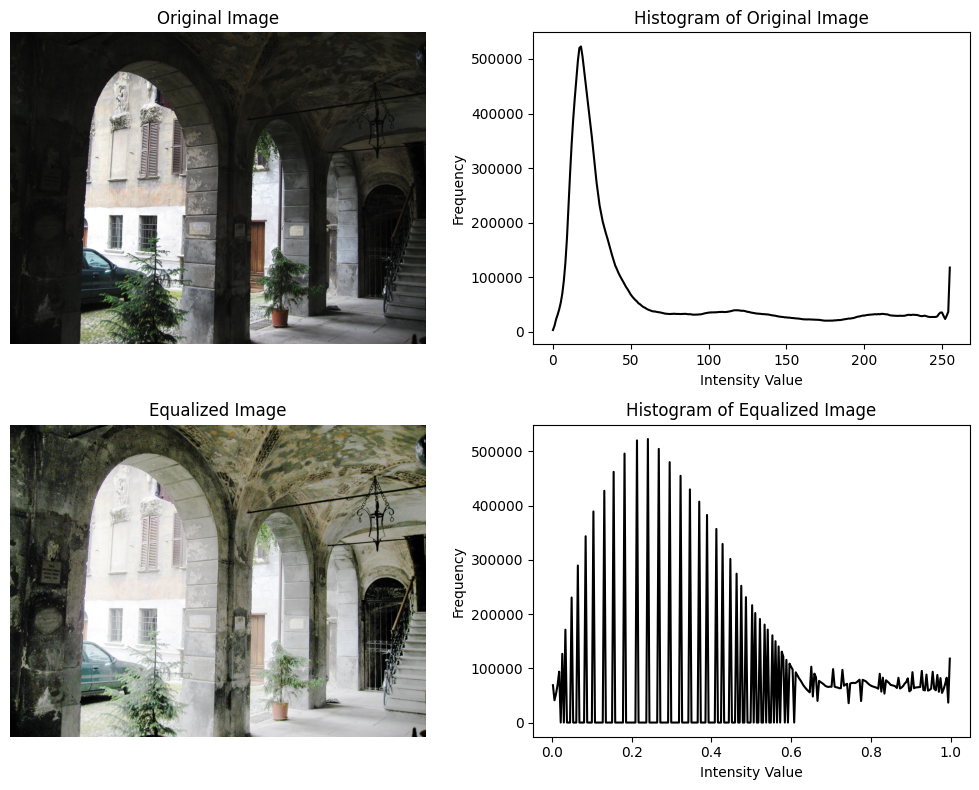

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import exposure

# Step 1: Read the 'aquatermi_lowcontrast.jpg' image
img = Image.open("/Users/taifaladwani/Desktop/4/aquatermi_lowcontrast.jpg")

# Convert the image to a numpy array
img_array = np.array(img)

# Step 2: Compute the histogram of the original image
original_hist, bins = exposure.histogram(img_array)

# Step 3: Perform histogram equalization to enhance contrast
equalized_image = exposure.equalize_hist(img_array)

# Step 4: Compute the histogram of the equalized image
equalized_hist, equalized_bins = exposure.histogram(equalized_image)

# Step 5: Plot the original and equalized images along with their histograms in a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the original image
axes[0, 0].imshow(img_array, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")  # Turn off axis

# Plot the histogram of the original image
axes[0, 1].plot(bins, original_hist, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Intensity Value")
axes[0, 1].set_ylabel("Frequency")

# Plot the equalized image
axes[1, 0].imshow(equalized_image, cmap='gray')
axes[1, 0].set_title("Equalized Image")
axes[1, 0].axis("off")  # Turn off axis

# Plot the histogram of the equalized image
axes[1, 1].plot(equalized_bins, equalized_hist, color='black')
axes[1, 1].set_title("Histogram of Equalized Image")
axes[1, 1].set_xlabel("Intensity Value")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

*(Double-click or enter to edit)*

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



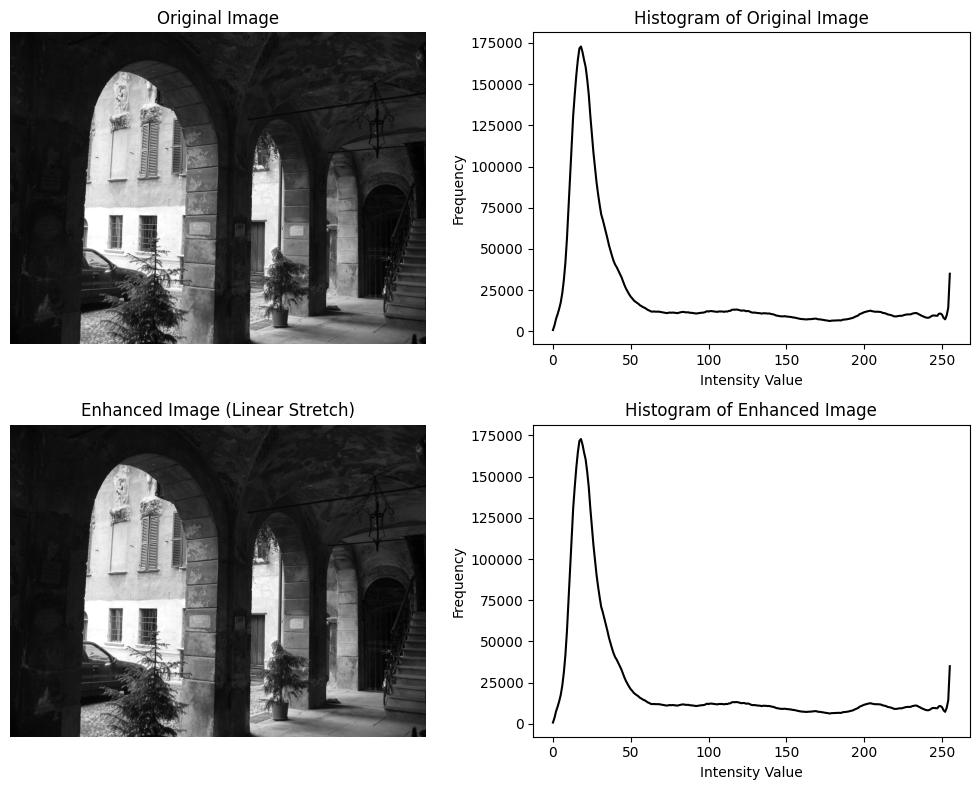

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import exposure

# Function to perform linear contrast stretch
def linear_contrast_stretch(image_array, bin_count=256):
    # Get the minimum and maximum pixel values
    min_pixel = np.min(image_array)
    max_pixel = np.max(image_array)
    
    # Define the new min and max (0 and 255 for 8-bit images)
    new_min = 0
    new_max = 255
    
    # Apply the linear contrast stretch formula
    stretched_image = ((image_array - min_pixel) / (max_pixel - min_pixel)) * (new_max - new_min) + new_min
    
    # Ensure the pixel values are within the valid range (0 to 255)
    stretched_image = np.clip(stretched_image, 0, 255).astype(np.uint8)
    
    return stretched_image

# Step 1: Read the 'aquatermi_lowcontrast.jpg' image
image_path = "/Users/taifaladwani/Desktop/4/aquatermi_lowcontrast.jpg"
image = io.imread(image_path)

# Convert the image to grayscale (if it's a color image)
gray_image = np.mean(image, axis=2).astype(np.uint8)  # Convert to grayscale by averaging the RGB channels

# Step 2: Compute the histogram of the original grayscale image
original_hist, bins = exposure.histogram(gray_image)

# Step 3: Perform linear contrast stretch to enhance the image
enhanced_image = linear_contrast_stretch(gray_image)

# Step 4: Compute the histogram of the enhanced image
enhanced_hist, enhanced_bins = exposure.histogram(enhanced_image)

# Step 5: Plot the original and enhanced images along with their histograms in a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the original grayscale image
axes[0, 0].imshow(gray_image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")  # Turn off axis

# Plot the histogram of the original grayscale image
axes[0, 1].plot(bins, original_hist, color='black')
axes[0, 1].set_title("Histogram of Original Image")
axes[0, 1].set_xlabel("Intensity Value")
axes[0, 1].set_ylabel("Frequency")

# Plot the enhanced image
axes[1, 0].imshow(enhanced_image, cmap='gray')
axes[1, 0].set_title("Enhanced Image (Linear Stretch)")
axes[1, 0].axis("off")  # Turn off axis

# Plot the histogram of the enhanced image
axes[1, 1].plot(enhanced_bins, enhanced_hist, color='black')
axes[1, 1].set_title("Histogram of Enhanced Image")
axes[1, 1].set_xlabel("Intensity Value")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




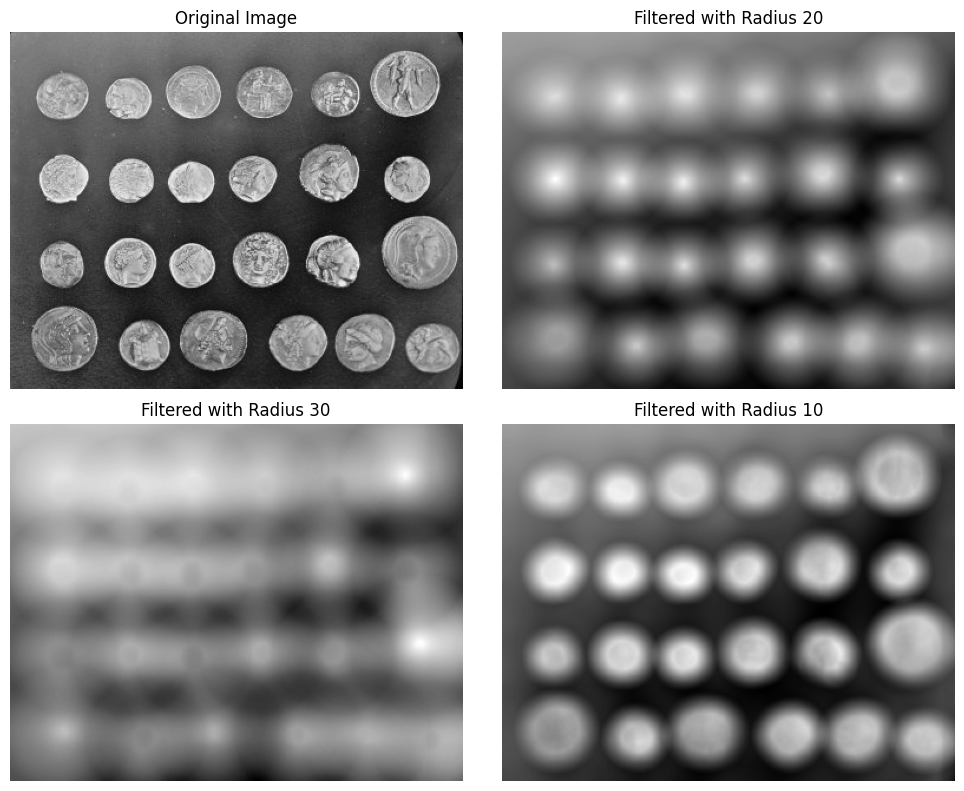

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, morphology

# Step 1: Load the 'coins' image from skimage.data
coins_image = data.coins()

# Step 2: Define the disk structuring element with radius 20
selem_20 = morphology.disk(20)

# Apply the mean filter with radius 20 (fixed the selem argument)
filtered_20 = filters.rank.mean(coins_image, selem_20)

# Step 3: Increase the radius to 30 and apply the mean filter
selem_30 = morphology.disk(30)
filtered_30 = filters.rank.mean(coins_image, selem_30)

# Step 4: Reduce the radius to 10 and apply the mean filter
selem_10 = morphology.disk(10)
filtered_10 = filters.rank.mean(coins_image, selem_10)

# Step 5: Visualize all the smoothened images along with the original image
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot the original image
axes[0, 0].imshow(coins_image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")

# Plot the filtered image with radius 20
axes[0, 1].imshow(filtered_20, cmap='gray')
axes[0, 1].set_title("Filtered with Radius 20")
axes[0, 1].axis("off")

# Plot the filtered image with radius 30
axes[1, 0].imshow(filtered_30, cmap='gray')
axes[1, 0].set_title("Filtered with Radius 30")
axes[1, 0].axis("off")

# Plot the filtered image with radius 10
axes[1, 1].imshow(filtered_10, cmap='gray')
axes[1, 1].set_title("Filtered with Radius 10")
axes[1, 1].axis("off")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

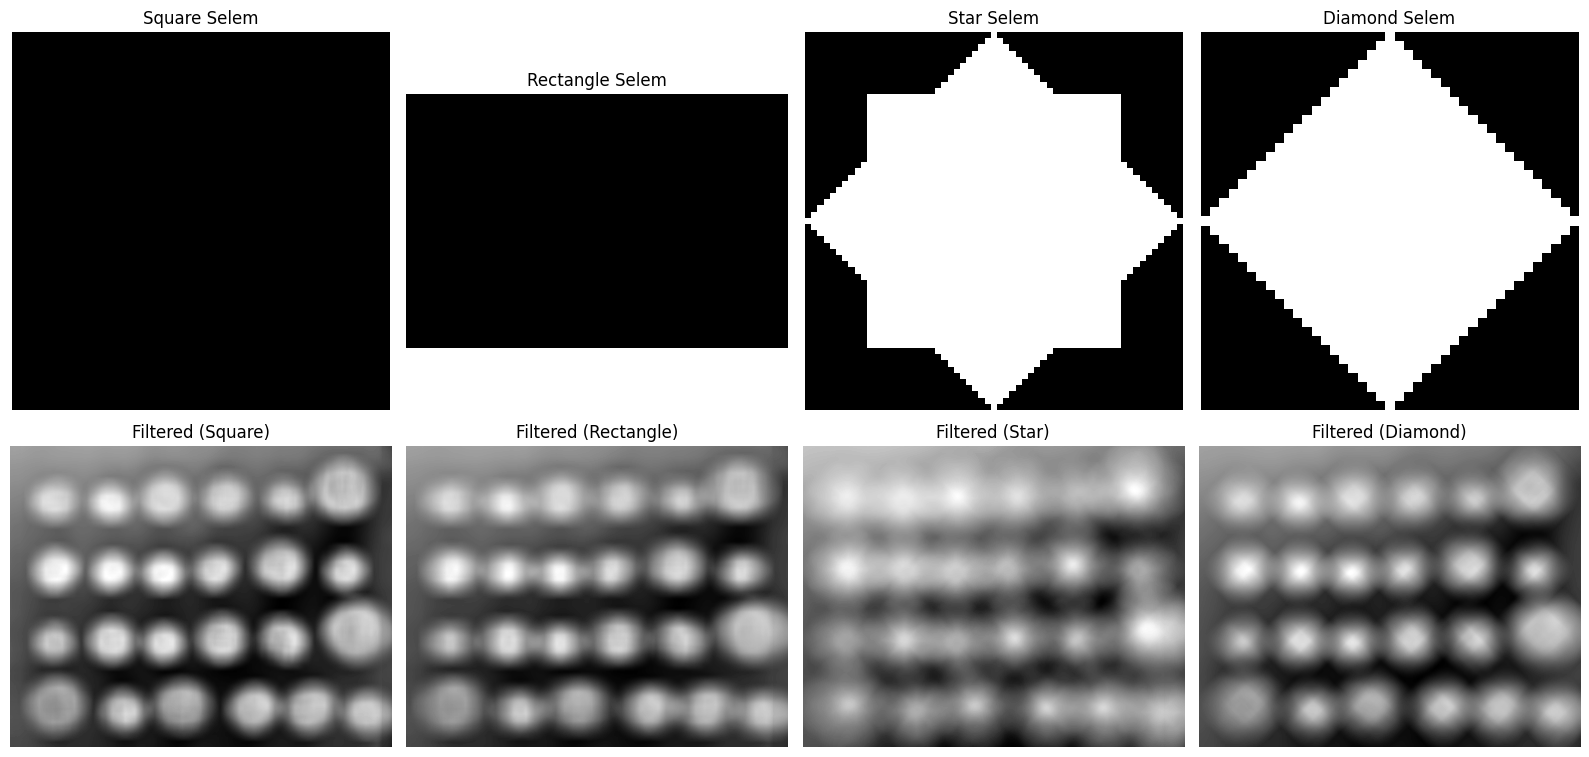

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, morphology

# Step 1: Load the 'coins' image from skimage.data
coins_image = data.coins()

# Step 2: Create different structuring elements (selem)
selem_square = morphology.square(20)
selem_rectangle = morphology.rectangle(20, 30)
selem_star = morphology.star(20)
selem_diamond = morphology.diamond(20)

# Step 3: Apply the mean filter with each selem
filtered_square = filters.rank.mean(coins_image, selem_square)
filtered_rectangle = filters.rank.mean(coins_image, selem_rectangle)
filtered_star = filters.rank.mean(coins_image, selem_star)
filtered_diamond = filters.rank.mean(coins_image, selem_diamond)

# Step 4: Visualize the selem and corresponding smoothened images in a 2x4 subplot
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Plot the square selem and filtered image
axes[0, 0].imshow(selem_square, cmap='gray')
axes[0, 0].set_title("Square Selem")
axes[0, 0].axis("off")

axes[1, 0].imshow(filtered_square, cmap='gray')
axes[1, 0].set_title("Filtered (Square)")
axes[1, 0].axis("off")

# Plot the rectangle selem and filtered image
axes[0, 1].imshow(selem_rectangle, cmap='gray')
axes[0, 1].set_title("Rectangle Selem")
axes[0, 1].axis("off")

axes[1, 1].imshow(filtered_rectangle, cmap='gray')
axes[1, 1].set_title("Filtered (Rectangle)")
axes[1, 1].axis("off")

# Plot the star selem and filtered image
axes[0, 2].imshow(selem_star, cmap='gray')
axes[0, 2].set_title("Star Selem")
axes[0, 2].axis("off")

axes[1, 2].imshow(filtered_star, cmap='gray')
axes[1, 2].set_title("Filtered (Star)")
axes[1, 2].axis("off")

# Plot the diamond selem and filtered image
axes[0, 3].imshow(selem_diamond, cmap='gray')
axes[0, 3].set_title("Diamond Selem")
axes[0, 3].axis("off")

axes[1, 3].imshow(filtered_diamond, cmap='gray')
axes[1, 3].set_title("Filtered (Diamond)")
axes[1, 3].axis("off")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*(Double-click or enter to edit)*

...


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*(Double-click or enter to edit)*

...



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

*(Double-click or enter to edit)*

...

How does changing the radius of the disk affect the smoothing functionality?
Changing the radius of the disk (structuring element) in a mean filter affects the extent of the smoothing operation. Here’s how:

Larger Radius:
A larger radius (e.g., disk with radius 30 or 40) means that more surrounding pixels are included in the averaging process.
As a result, more smoothing occurs, and the image becomes more blurred.
This can help remove more noise or detail but may also lead to losing fine details (such as edges) in the image.
Smaller Radius:
A smaller radius (e.g., disk with radius 10) means that only a smaller neighborhood of pixels is involved in the averaging process.
This results in less smoothing, and the image retains more fine details but may still reduce noise to some extent.
A smaller radius may not be as effective in removing larger noise or smoothing out irregularities.
Observed behavior with differences in the structuring element:
Different structuring elements (e.g., square, rectangle, star, diamond) will affect the image in different ways during the mean filtering process:

Square Structuring Element:
The square shape applies an equal average to the surrounding pixels in all directions.
The result is uniform smoothing in a regular grid pattern.
Rectangle Structuring Element:
The rectangular structuring element applies a more elongated smoothing in one direction.
The image will appear more smoothed in that direction, while the perpendicular direction will retain more details.
This can be useful for smoothing images with horizontal or vertical structures (e.g., text or patterns).
Star Structuring Element:
The star shape allows smoothing in multiple directions radiating from the center, making it a more complex smoothing pattern.
The result may be a more uniform blur with less emphasis on a specific direction.
Diamond Structuring Element:
The diamond structuring element has a similar effect to the star but with a more constrained shape, which might create slightly different results in terms of smoothing patterns, especially near corners or edges.
It’s a balanced approach, offering smoothing in multiple directions without the full radial pattern of the star.
In summary, different structuring elements can produce varying smoothing effects due to their shape and how they average surrounding pixels. For instance, rectangles are more effective in one direction, while stars and diamonds offer more comprehensive smoothing.

Difference Between Mean Filter and Gaussian Filter:
Mean Filter:
The mean filter is a simple filter that replaces each pixel with the average value of its neighboring pixels within a defined window (such as a square or disk).
It assigns equal weight to all pixels in the neighborhood.
It is computationally simple but tends to blur edges and can introduce blocky effects in images due to its uniformity.
Gaussian Filter:
The Gaussian filter uses a Gaussian distribution to weight neighboring pixels, giving higher weights to those closer to the center of the kernel and lower weights to those farther away.
The filter is more natural and smoother because it respects the idea of "closeness" in the neighborhood.
It helps preserve edges better than the mean filter by applying smoother transitions between pixels.
Key Differences:
Weighting: In a mean filter, all neighboring pixels have equal weight. In a Gaussian filter, pixels closer to the center have higher weight, making it less aggressive and more gradual in smoothing.
Edge Preservation: The Gaussian filter preserves edges better, as it doesn’t blur as aggressively at boundaries or sharp transitions.
Effect on Noise: The mean filter is more effective in removing salt-and-pepper noise, while the Gaussian filter is better for reducing Gaussian noise without significant blurring of edges.
Where Do You Use Mean Filters and Where Do You Use Gaussian Filters?
Mean Filters:
Use cases:
Noise reduction: Best suited for removing salt-and-pepper noise (i.e., random bright or dark pixels).
Quick smoothing: Can be used when the processing time is a priority, as it is computationally simpler.
Limitations: It blurs edges and is less effective at preserving the natural structure of the image.
Applications: Basic image preprocessing where sharp edges are not critical (e.g., initial noise reduction in simple computer vision tasks).
Gaussian Filters:
Use cases:
Edge preservation: Useful in applications where you need to smooth the image while preserving edges, such as in image preprocessing for edge detection, or blurred background effects.
Gaussian noise reduction: Effective in reducing Gaussian noise without disturbing the sharpness of the image.
Applications:
Feature extraction: For example, in edge detection algorithms like the Canny edge detector, Gaussian blurring is often used to reduce noise before detecting edges.
Image denoising: When high-quality results are needed and edges must be maintained, such as in medical imaging or photography.
